In [125]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img

In [126]:
with MPRester("HPRMToUrA4F7voa8") as m:

    # Structure for material id
    bs = m.get_bandstructure_by_material_id("mp-961649")

# Bande Interdite

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

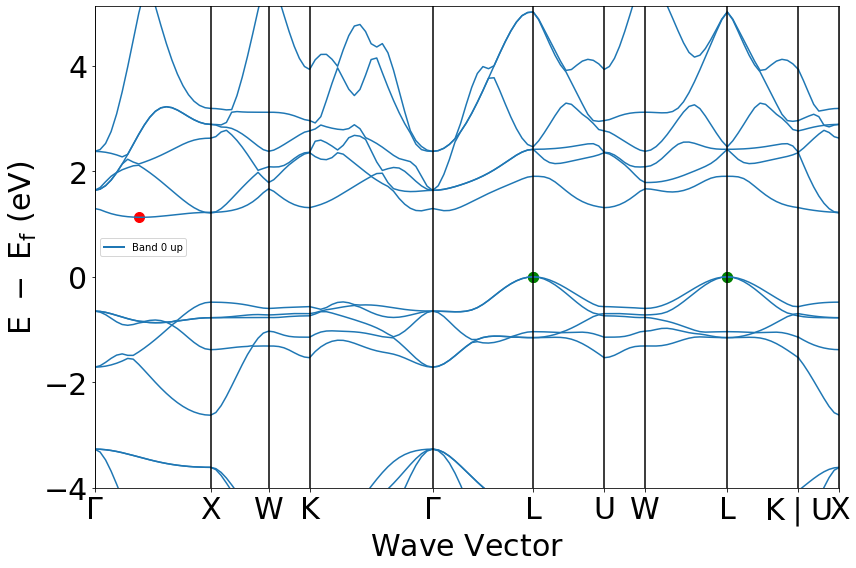

In [127]:
graph = BSPlotter(bs)
graph.get_plot(vbm_cbm_marker=True)

In [128]:
print("Direct band gap : " + str(bs.get_band_gap()['direct']) + "\nEnergy : " + 
      str(round(bs.get_band_gap()['energy'], 4)) + "[eV]" + "\nTransition : " + 
      bs.get_band_gap()['transition'])

Direct band gap : False
Energy : 1.1293[eV]
Transition : L-(0.190,0.000,0.190)


La bande interdite a une énergie proche de 1eV, on est donc en présence d'un semi-conducteur. La bande interdite étant indirecte, le quanta devra obligatoirement subir un changement de vecteur d'onde pour passer de la bande de valence à la bande de conduction.

# Dispersion

In [129]:
data = graph.bs_plot_data()

#Distances par rapport à la première branche
d = data.get('ticks').get('distance')

#On supprime les distances redondantes
dist = np.array([d[0], d[1], d[3], d[5], d[7], d[9], d[11], d[13], d[15], d[17], d[18]])

#distance entre chaque branche consécutive
dist_branch = np.array([d[1]-d[0], d[3]-d[1], d[5]-d[3], d[7]-d[5], d[9]-d[7], d[11]-d[9], d[13]-d[11], d[15]-d[13], d[17]-d[15], d[18]-d[17],])

In [130]:
print("Bandes contenant le max de la bande de valence :" , bs.get_vbm()['band_index'])
print("Bandes contenant le min de la bande de conduction :" ,bs.get_cbm()['band_index'])

Bandes contenant le max de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


La première bande de conduction est donc la bande numéro 16. Pour ce qui est de la dernière bande de valence, on constate qu'il y a deux bandes de valances qui partagent des maximums communs. Cependant, sachant que la première bande de condution est la 16ème, on va considérer que la dernière bande de valence la précède directement et on choisit donc comme dernière bande de valence la 15ème bande.

# Dernière bande de valance

In [131]:
pmaxV = 0
pminV = 1000
imaxV = 0
iminV = 0

for i in range(len(dist_branch)) :
    energy = data.get('energy').get('1')[i][15]
    slopeV = (energy[-1]-energy[0])/dist_branch[i]
    
    if np.abs(slopeV) > np.abs(pmaxV) :
        pmaxV = slopeV
        imaxV = i
        
    if np.abs(slopeV) < np.abs(pminV) :
        pminV = slopeV
        iminV = i
        
print("Direction avec la plus grande dispersion : L - U avec une pente de ", pmaxV)
print("Direction avec la plus petite dispersion : K - \u0393 avec une pente de ", pminV)

Direction avec la plus grande dispersion : L - U avec une pente de  -0.8995841287931745
Direction avec la plus petite dispersion : K - Γ avec une pente de  -0.07818649269746024


# Première bande de conduction

In [132]:
pmaxC = 0
pminC = 1000
imaxC = 0
iminC = 0

for i in range(len(dist_branch)) :
    energy = data.get('energy').get('1')[i][16]
    slopeC = (energy[-1]-energy[0])/dist_branch[i]
    
    if np.abs(slopeC) > np.abs(pmaxC) :
        pmaxC = slopeC
        imaxC = i
        
    if np.abs(slopeC) < np.abs(pminC) :
        pminC = slopeC
        iminC = i
        
print("Direction avec la plus grande dispersion : W - K avec une pente de ", pmaxC)
print("Direction avec la plus petite dispersion : K - \u0393 avec une pente de ", pminC)

Direction avec la plus grande dispersion : W - K avec une pente de  -0.9834409140230825
Direction avec la plus petite dispersion : K - Γ avec une pente de  -0.01552704731594663


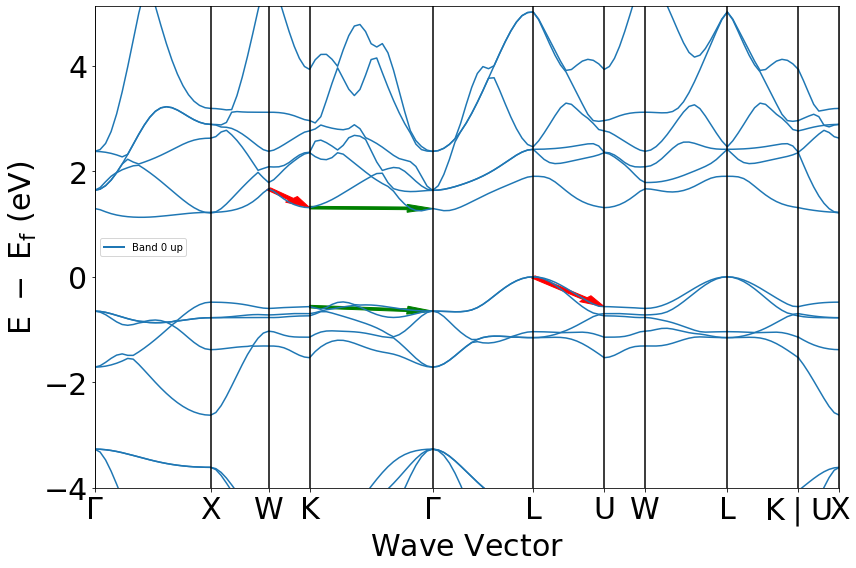

In [133]:
graph.get_plot()

plt.arrow(dist[imaxV],data.get('energy').get('1')[imaxV][15][0],dist_branch[imaxV],
          data.get('energy').get('1')[imaxV][15][-1]-data.get('energy').get('1')[imaxV][15][0], 
          width = 0.05,length_includes_head=True,color='r')
plt.arrow(dist[iminV],data.get('energy').get('1')[iminV][15][0],dist_branch[iminV],
          data.get('energy').get('1')[iminV][15][-1]-data.get('energy').get('1')[iminV][15][0],
          width = 0.05,length_includes_head=True,color='g')
plt.arrow(dist[imaxC],data.get('energy').get('1')[imaxC][16][0],dist_branch[imaxC],
          data.get('energy').get('1')[imaxC][16][-1]-data.get('energy').get('1')[imaxC][16][0],
          width = 0.05,length_includes_head=True,color='r')
plt.arrow(dist[iminC],data.get('energy').get('1')[iminC][16][0],dist_branch[iminC],
          data.get('energy').get('1')[iminC][16][-1]-data.get('energy').get('1')[iminC][16][0],
          width = 0.05,length_includes_head=True,color='g')

plt.show()

Les flèches vertes représentent la plus petite dispersion et les flèches rouges la plus grande.

# Masse effective

Le calcul de la masse effective est donné par la formule suivante:
<br>
<br>
<center> 
    $m^{*}_{i,j} = \hbar^{2} \left(\frac{\partial^{2}E}{\partial k_{i}\partial k_{j}}\right)^{-1}$
</center>
<br>

En considérant une dispertion parabolique, on peut approximer l'énergie $E$ par:
<br>
<br>
<center>
    $E = ak^2+bk+c$
</center> 
<br>
Les trois coefficients peuvent être obtenu aisémet par une interpolation polynomiale avec trois points.

In [134]:
print("Maximums de la bande de valence : ",data['vbm'])
print("\nMinimum de la bande conduction : ",data['cbm'])

Maximums de la bande de valence :  [(3.8791879440758206, 0.0), (3.8791879440758206, 0.0), (5.59601272130993, 0.0), (5.59601272130993, 0.0)]

Minimum de la bande conduction :  [(0.3909239317918283, 1.1292999999999997)]


Pour la suite des calculs on prendra le point (3.8791879440758206, 0.0) comme maximum de la bande de valence et le point (0.3909239317918283, 1.1292999999999997) comme minimum de la bande de conduction.

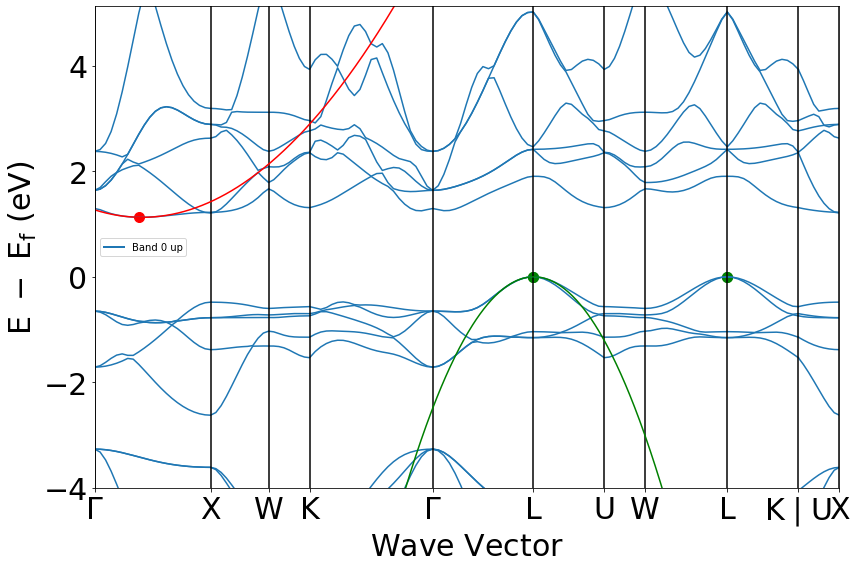

In [135]:
xV = [data.get('distances')[4][-3], data.get('distances')[5][0], data.get('distances')[5][3]]
xC = [data.get('distances')[0][5], data.get('distances')[0][8], data.get('distances')[0][11]]

yV = [data.get('energy').get('1')[4][15][-3], data.get('energy').get('1')[5][15][0], data.get('energy').get('1')[5][15][3]]
yC = [data.get('energy').get('1')[0][16][5], data.get('energy').get('1')[0][16][8], data.get('energy').get('1')[0][16][11]]

coefV = np.polyfit(xV, yV, 2)
coefC = np.polyfit(xC, yC, 2)

x = np.linspace(0,d[-1],1000)

yV =coefV[0]*x*x+coefV[1]*x+coefV[2]
yC =coefC[0]*x*x+coefC[1]*x+coefC[2]

graph.get_plot(vbm_cbm_marker=True)
plt.plot(x, yV, color='green')
plt.plot(x, yC, color='red')
plt.show()

In [136]:
h_ = (6.62607015e-34)/(2*math.pi)
to_SI = 1e20/1.60218e-19
mv = (h_**2/(2*coefv[0]))*to_SI
mc = (h_**2/(2*coefc[0]))*to_SI
me = 9.1094e-31

print("Masse effective au sommet de la dernière bande de valence : \n m* = ", mv, "[kg] = ",mv/me, "[u.a.]")
print("\n")
print("Masse effective à la base de la première bande de conduction : \n m* = ", mc, "[kg] = ",mc/me, "[u.a.]")

Masse effective au sommet de la dernière bande de valence : 
 m* =  -2.1121053634629575e-29 [kg] =  -23.185998676783957 [u.a.]


Masse effective à la base de la première bande de conduction : 
 m* =  1.0963222155687336e-30 [kg] =  1.2035065048946514 [u.a.]
